In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow,imread
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
import tensorflow as tf
import os


In [118]:
train_df = pd.read_csv('dataset/RSNA_Annotations/RSNA_Annotations/BONEAGE/boneage_train.csv')
train_df ['ID'] = train_df['ID'].map(lambda x: f'{x}.png')
train_df['Male']= train_df['Male'].map(lambda x: 1 if (x == True) else 0)
train_df

,ID,Male,Boneage
0,1377.png,0,180
1,1378.png,0,12
2,1379.png,0,94
3,1380.png,1,120
4,1381.png,0,82
...,...,...,...
12606,15605.png,0,50
12607,15606.png,0,113
12608,15608.png,0,55
12609,15609.png,1,150


In [119]:
test_df = pd.read_csv('dataset/RSNA_Annotations/RSNA_Annotations/BONEAGE/gender_test.csv')
test_df['ID'] = test_df['ID'].map(lambda x: f'{x}.png')
test_df

,ID,Male
0,4360.png,True
1,4361.png,True
2,4362.png,True
3,4363.png,True
4,4364.png,True
...,...,...
195,4555.png,False
196,4556.png,False
197,4557.png,False
198,4558.png,False


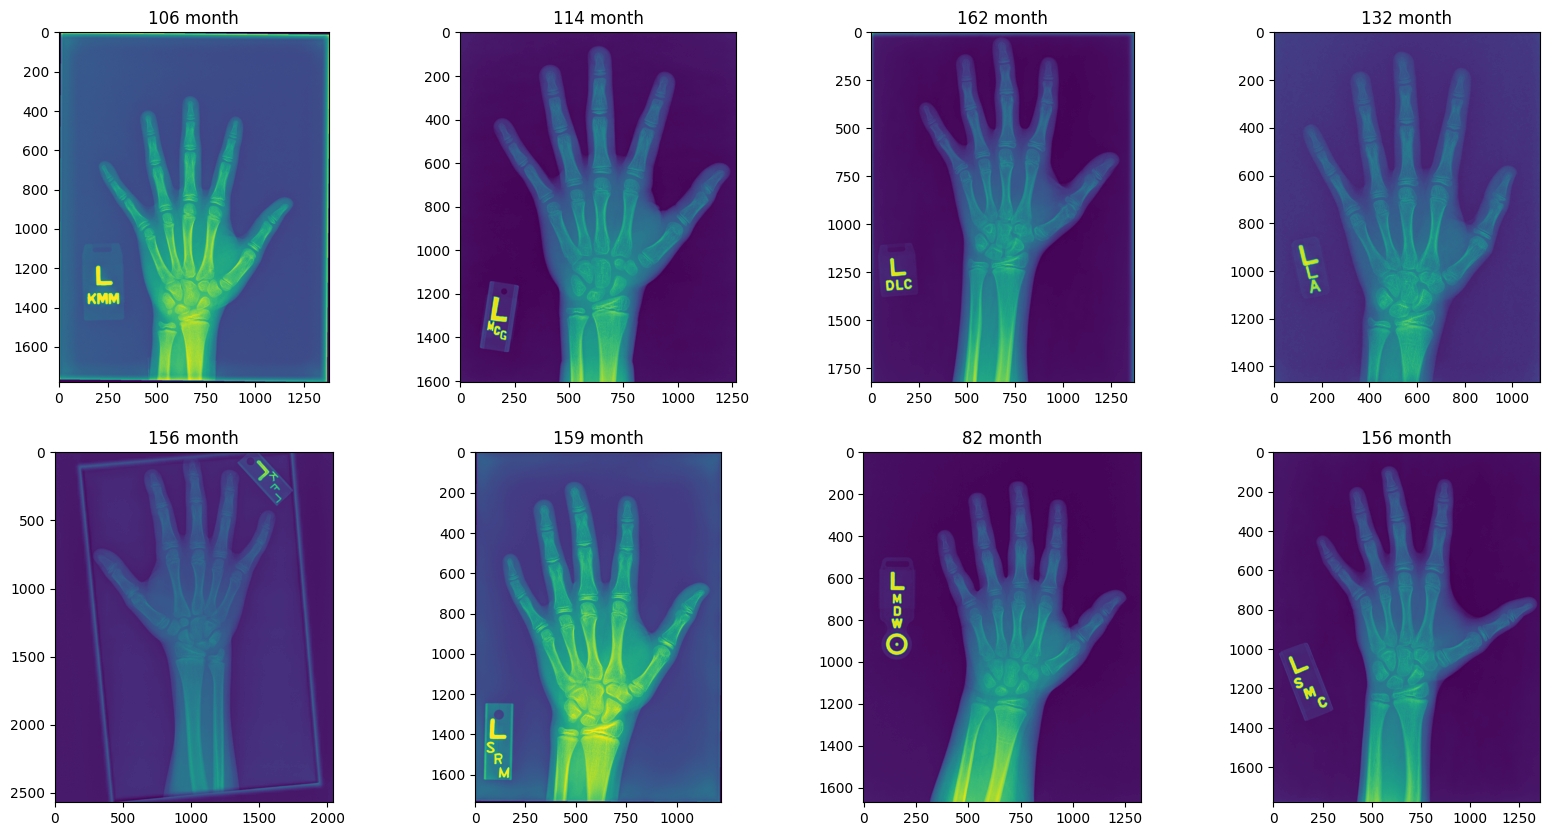

In [121]:
train_dir='dataset/RSNA_train/images'
test_dir= 'dataset/RSNA_test/images'
sample = train_df.sample(n=8)
fig,axx = plt.subplots(2,4, figsize=(20,10))
for idd,boneage,place in zip(sample['ID'],sample['Boneage'],axx.flatten()):
    place.imshow(imread(f"{train_dir}/{idd}"))
    place.set_title(str(boneage)+' month')

In [123]:
core_dg = tf.keras.preprocessing.image.ImageDataGenerator()

train_dg = core_dg.flow_from_dataframe(
    train_df,
    directory=train_dir,
    x_col='ID',
    y_col='Boneage',
    target_size=(256,256),
    color_mode='grayscale',
    class_mode='raw',
    classes=None,
    batch_size=32,
    shuffle=True,
    save_format='png',
    interpolation='nearest',
)

Found 12611 validated image filenames.


In [124]:
test_dg = core_dg.flow_from_dataframe(
    test_df,
    x_col='ID',
    directory=test_dir,
    class_mode=None,
    )

Found 200 validated image filenames.


In [126]:
from keras.layers import Dense, MaxPooling2D, Input, Conv2D, Dropout, BatchNormalization, Flatten
from keras.metrics import MeanAbsoluteError
from keras.models import Model

In [127]:
input_shape=(256,256,1)
dropout_rate = 0.35

model_input= Input(shape=input_shape)

x = Conv2D(32,(3,3),activation='relu',padding='same')(model_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(dropout_rate)(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(dropout_rate)(x)

x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(dropout_rate)(x)

x = Flatten()(x)
x = Dense(50,activation='relu')(x)
x = Dense(10,activation='relu')(x)
model_output = Dense(1,activation='linear')(x)


In [128]:
model = Model(model_input,model_output)

model.compile(loss='mse',optimizer='adam',metrics=[MeanAbsoluteError()])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_50 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_49 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_50 (Bat  (None, 128, 128, 64)     256

In [129]:
model.fit_generator(train_dg, epochs = 2)

C:\Users\prkna\AppData\Local\Temp\ipykernel_13892\103411813.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dg, epochs = 2)


Epoch 1/2
395/395 [==============================] - 258s 650ms/step - loss: 1375.3042 - mean_absolute_error: 28.8870
Epoch 2/2
395/395 [==============================] - 254s 642ms/step - loss: 880.1733 - mean_absolute_error: 23.0904


In [130]:
model.save('chkpt.h5')

In [141]:
import cv2


In [159]:
for _,i in train_df.iterrows():
    print(i['ID'],i['Boneage'])

1377.png 180
1378.png 12
1379.png 94
1380.png 120
1381.png 82
1382.png 138
1383.png 150
1384.png 156
1385.png 36
1387.png 138
1388.png 126
1389.png 138
1390.png 156
1391.png 180
1393.png 132
1394.png 57
1395.png 120
1396.png 188
1398.png 4
1399.png 36
1400.png 132
1402.png 24
1403.png 60
1404.png 159
1405.png 120
1406.png 106
1407.png 30
1408.png 126
1409.png 149
1411.png 33
1412.png 156
1414.png 78
1415.png 88
1416.png 162
1417.png 162
1418.png 24
1419.png 126
1420.png 88
1422.png 32
1423.png 94
1424.png 120
1425.png 156
1426.png 54
1427.png 174
1428.png 33
1429.png 54
1430.png 144
1431.png 27
1432.png 170
1433.png 24
1434.png 113
1435.png 180
1436.png 108
1437.png 136
1438.png 165
1439.png 60
1440.png 42
1441.png 42
1442.png 156
1443.png 94
1444.png 150
1445.png 21
1446.png 132
1447.png 69
1448.png 50
1451.png 90
1452.png 180
1453.png 192
1454.png 21
1455.png 32
1457.png 126
1458.png 84
1459.png 84
1460.png 96
1461.png 96
1462.png 120
1463.png 120
1464.png 94
1466.png 216
1467.png 54

In [162]:
for _,i in train_df.head(10).iterrows():
    img = cv2.imread(f"dataset/RSNA_train/images/{i['ID']}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1, 256, 256, 1))
    print(i['Boneage'])
    print(model.predict(img,verbose=0))
    print('-'*30)

180
[[152.66371]]
------------------------------
12
[[99.56847]]
------------------------------
94
[[138.96648]]
------------------------------
120
[[131.37036]]
------------------------------
82
[[116.67681]]
------------------------------
138
[[140.96223]]
------------------------------
150
[[125.137634]]
------------------------------
156
[[123.13922]]
------------------------------
36
[[77.66786]]
------------------------------
138
[[125.12512]]
------------------------------


In [140]:
res = model.predict(img)

print(res)

1/1 [==============================] - 0s 40ms/step
[[131.37036]]
